# Boosting in ML

## AdaBoost in Machine Learning

AdaBoost is a boosting technique that combines several weak classifiers in sequence to build a strong one. Each new model focuses on correcting the mistakes of the previous one until all data is correctly classified or a set number of iterations is reached.

Think of it like in a class, a teacher focuses more on weak learners to improve its academic performance, similarly boosting work.

![alt text](420046939.webp)

### Process

#### Step 1: Initial Model (B1)
#### Step 2: Adjusting Weights (B2)
#### Step 3: Further Adjustment (B3)
#### Step 4: Final Strong Model (B4 - Ensemble Model)

## Types Of Boosting Algorithms

1. AdaBoost (Adaptive Boosting)
2. Gradient Boosting
3. XGBoost (Extreme Gradient Boosting)
4. LightGBM (Light Gradient Boosting Machine)
5. CatBoost (Categorical Boosting)

8 **Gradient Boosting:** Gradient Boosting constructs models in a sequential manner where each weak learner minimizes the residual error of the previous one using gradient descent. Instead of adjusting sample weights like AdaBoost Gradient Boosting reduces error directly by optimizing a loss function.
* **XGBoost:** XGBoost is an optimized version of Gradient Boosting that uses regularization to prevent overfitting. It is faster, efficient and supports handling both numerical and categorical variables.
* **CatBoost:** CatBoost is particularly effective for datasets with categorical features. It employs symmetric decision trees and a unique encoding method that considers target values, making it superior in handling categorical data without preprocessing.

## Advantages of Boosting 

1. Improved Accuracy
2. Versatility
3. Reduced Overfitting
4. Feature Importance
5. Flexibility

# Implementing the AdaBoost Algorithm From Scratch


### Importing Libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

### 2. Defining the AdaBoost Class

In this step we define a custom class called AdaBoost that will implement the AdaBoost algorithm from scratch. This class will handle the entire training process and predictions.

The AdaBoost class is where we define the entire AdaBoost algorithm which consists of:

* Initializing model parameters like number of estimators, weights and models.
* Fitting the model to the training data.
* Making predictions using the trained model.

In [3]:
class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, n_featuers = X.shape
        w = np.ones(n_samples)/n_samples

        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=w)
            predictions = model.predict(X)

            err = np.sum(w*(predictions !=y)) / np.sum(w)

            alpha = 0.5 * np.log((1-err)/ (err +1e-10))

            self.models.append(model)
            self.alphas.append(alpha)

            w *= np.exp(-alpha * y * predictions)
            w /= np.sum(w)

    def predict(self, X):
        strong_preds = np.zeros(X.shape[0])

        for model, alpha in zip(self.models, self.alphas):
            predictions = model.predict(X)
            strong_preds += alpha * predictions
        
        return np.sign(strong_preds).astype(int)

### 3. Training the AdaBoost Model

In the fit() method we:

* Sample Weights Initialization: w= np.ones(n_samples) / n_samples initializes all sample weights equally.
* Training the Weak Classifier: A DecisionTreeClassifier with max_depth =1 is trained using the current sample weights.
* Error Calculation: err = np.sum (w* ( predictions != y)) / np.sum(w) computes the weighted error of the classifier.
* Alpha Calculation: alpha = 0.5*np.log ((1-err) / (err+1e-10) ) calculates the classifier's weight (alpha).
* Updating Weights: Misclassified samples weights are increased using w *= np.exp(-alpha *y *predictions) and normalized with w /= np.sum(w).

### 4. Defining Predict Method

In the predict() method we combine the predictions of all weak classifiers using their respective alpha values to make the final prediction.

* strong_preds = np.zeroes(X.shape[0]) initializes an array of zeros to store the weighted sum of predictions from all weak classifiers.
* for model, alpha in zip(self.models, self.alphas) loops through each trained model and its corresponding alpha value.
* strong_preds += alpha * predictions adds the weighted prediction of each weak model to strong_preds
* np.sign(strong_preds) takes the sign of the sum to classify samples as 1 (positive class) or -1 (negative class).

### 5. Example Usage

* We are generating a synthetic dataset with 1000 samples and 20 features.
* Then, we split the data into training and testing sets.
* We initialize and train an AdaBoost classifier with 50 estimators.
* After training, we predict on the test set and evaluate the model.

In [9]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

if __name__ == "__main__":

    X, y = make_classification(
        n_samples=1000,
        n_features=20,
        n_classes=2,
        random_state=42
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    adaboost = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        random_state=42
    )

    adaboost.fit(X_train, y_train)

    predictions = adaboost.predict(X_test)
    probabilities = adaboost.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")

C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 85.67%
Precision: 0.8835616438356164
Recall: 0.832258064516129
F1 Score: 0.8571428571428571
ROC-AUC: 0.9098998887652948


In [10]:
# if __name__ == "__main__":

#     X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     adaboost = AdaBoost(n_estimators=50)
#     adaboost.fit(X_train, y_train)

#     predictions = adaboost.predict(X_test)

#     accuracy = accuracy_score(y_test, predictions)
#     precision = precision_score(y_test, predictions)
#     recall = recall_score(y_test, predictions)
#     f1 = f1_score(y_test, predictions)
#     try:
#         roc_auc = roc_auc_score(y_test, predictions)
#     except ValueError:
#         roc_auc = 'Undefined (requires probability scores)'

#     print(f"Accuracy: {accuracy * 100}%")
#     print(f"Precision: {precision}")
#     print(f"Recall: {recall}")
#     print(f"F1 Score: {f1}")
#     print(f"ROC-AUC: {roc_auc}")

                                                                        Gradient Boosting in ML                                              

# Gradient Boosting in ML

Gradient Boosting is a boosting algorithm and here each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration the algorithm computes the gradient of the loss function with respect to predictions and then trains a new weak model to predict this gradient. Predictions of the new model are then added to the ensemble (all models prediction) and the process is repeated until a stopping criterion is met.

## Shrinkage and Model Complexity

A key feature of Gradient Boosting is shrinkage which scales the contribution of each new model using learning rate (denoted as 
η).

* **Smaller learning rates:** mean the contribution of each tree is smaller which reduces the risk of overfitting but requires more trees to achieve the same performance.
* **Larger learning rates:** mean each tree has a more significant impact but this can lead to overfitting.

There's a trade off between the learning rate and the number of estimators (trees) a smaller learning rate usually means more trees are required to achieve optimal performance.

## Working of Gradient Boosting

1. Sequential Learning Process

2. Residuals Calculation

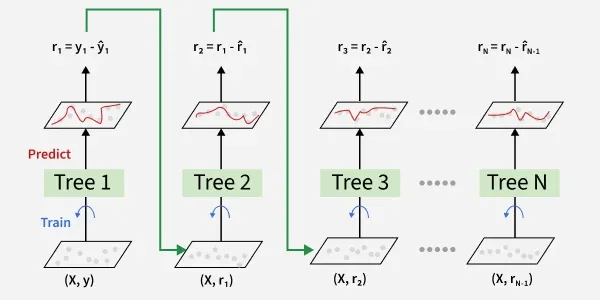

3. Shrinkage



## Implementing Gradient Boosting for Classification and Regression

* **n_estimators:** This specifies the number of trees (estimators) to be built. A higher value typically improves model performance but increases computation time.
* **learning_rate:** This is the shrinkage parameter. It scales the contribution of each tree.
* **random_state:** It ensures reproducibility of results. Setting a fixed value for random_state ensure that you get the same results every time you run the model.
* **max_features:** This parameter limits the number of features each tree can use for splitting. It helps prevent overfitting by limiting the complexity of each tree and promoting diversity in the model.

# Classification

We use Gradient Boosting Classifier to predict digits from Digits dataset.

* Import the necessary libraries
* Setting SEED for reproducibility
* Load the digit dataset and split it into train and test.
* Instantiate Gradient Boosting classifier and fit the model.
* Predict the test set and compute the accuracy score.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

SEED = 23

X, y = load_digits(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 
gbc.fit(train_X, train_y)

pred_y = gbc.predict(test_X)

acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.98


# Regression

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

SEED = 23

X, y = load_diabetes(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1, 
                                random_state = SEED,
                                max_features = 5)

gbr.fit(train_X, train_y)

pred_y = gbr.predict(test_X)

test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 56.39


## How to Tune Hyperparameters in Gradient Boosting Algorithm


## Gradient Boosting Hyperparameters

* **n_estimators:** Number of boosting stages to be run. More estimators can improve performance but may lead to overfitting.
* **learning_rate:** Controls the contribution of each tree. Lower values require more trees but can improve generalization.
* **max_depth:** Maximum depth of each tree. Deeper trees can capture more complex patterns but may overfit.
* **min_samples_split:** Minimum number of samples required to split an internal node. Higher values prevent overfitting.
* **min_samples_leaf:** Minimum number of samples required to be at a leaf node. Higher values can smooth the model.
* **subsample:** Fraction of samples used for fitting each base learner. Values less than 1.0 introduce randomness and can help prevent overfitting.
* **sampling:** Fraction of samples used for fitting each base learner. Values less than 1.0 introduce randomness and can help prevent overfitting.

## Gradient Boosting Hyperparameter Tuning in Python

### Classification Model without Tuning

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

titanic_data = pd.read_csv("https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv")

titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7988826815642458


## 1. Hyperparameter Tuning using GridSeachCV

GridSearchCV systematically tests all possible combinations of hyperparameters from a predefined grid to identify the best configuration for a model. It is most effective when the number of combinations is relatively small. With GradientBoostingClassifier(), we can pass the model into GridSearchCV and fit it on the training data to obtain the optimal parameters.

* **param_grid:** A dictionary containing hyperparameters and their possible values. GridSearchCV will try every combination of these values to find the best-performing set of hyperparameters.
* **grid_search.fit(X_train, y_train):** This line trains the Gradient Boosting model using all combinations of the hyperparameters defined in param_grid.
* **grid_search.best_estimator_:** After completing the grid search this will return the Gradient Boosting model that has the best combination of hyperparameters from the search.
* **best_params:** This stores the best combination of hyperparameters found during the grid search.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

titanic_data = pd.read_csv("https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv")

titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Model Accuracy: 0.8044692737430168


## 2. Hyperparameter Tuning using RandomizedSearchCV

RandomizedSearchCV is used to tune hyperparameters by sampling random combinations from a predefined grid. Unlike GridSearchCV, it does not search all possibilities, making it faster and more practical when the parameter space is large. With GradientBoostingClassifier(), we can pass the model to RandomizedSearchCV and fit it on the training data to identify a strong set of parameters without evaluating every option.

* **param_dist:** it will randomly sample from this distribution to find the best-performing combination of hyperparameters.
* **random_search.fit(X_train, y_train):** This line trains the GradientBoostingClassifier model using random combinations of hyperparameters defined in param_dist.
* **random_search.best_estimator_:** This retrieves the model that has the best combination of hyperparameters found during the random search.
* **best_params:** This stores the best combination of hyperparameters found during the search.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

titanic_data = pd.read_csv("https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv")

titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'learning_rate': np.arange(0.01, 0.2, 0.01), 
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [3, 5, 7, 9],  
}

gb_model = GradientBoostingClassifier()

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.060000000000000005}
Best Model Accuracy: 0.8044692737430168


## 3. Hyperparameter Tuning using Optuna

Optuna is an efficient framework for hyperparameter tuning that searches for settings to improve model performance. The process begins with defining an objective function, which Optuna then attempts to minimize or maximize through iterative trials. Its flexibility allows it to work well across different models and tasks, including Gradient Boosting, where it can be used to identify the most effective hyperparameters.

* **param_space:** Defines the hyperparameter search space where Optuna samples values for n_estimators, learning_rate and max_depth within the specified ranges.
* **objective(trial):** The objective function that it tries to minimize. It trains the GradientBoostingClassifier with different hyperparameters, calculates the accuracy and returns the inverse of accuracy.
* **study.optimize(objective, n_trials=50):** This runs the optimization process for 50 trials exploring the hyperparameter space and finding the best-performing combination of parameters.
* **study.best_params:** Returns the best combination of hyperparameters found during the optimization process.
* **best_model_optuna.fit(X_train, y_train):** Fits the GradientBoostingClassifier model using the best hyperparameters found by it.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import optuna

titanic_data = pd.read_csv("https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv")

titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 250, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
    }

    gb_model = GradientBoostingClassifier(**param_space, validation_fraction=0.1, n_iter_no_change=5, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return 1.0 - accuracy 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
best_model_optuna = GradientBoostingClassifier(**best_params_optuna, validation_fraction=0.1, n_iter_no_change=5, random_state=42)
best_model_optuna.fit(X_train, y_train)

y_pred_best_optuna = best_model_optuna.predict(X_test)

accuracy_best_optuna = accuracy_score(y_test, y_pred_best_optuna)
print(f"Best Model Accuracy (Optuna): {accuracy_best_optuna}")

[I 2026-01-22 01:04:25,913] A new study created in memory with name: no-name-23c166b6-fed6-4413-8b0c-f90599a1a23f
[I 2026-01-22 01:04:26,143] Trial 0 finished with value: 0.2011173184357542 and parameters: {'n_estimators': 100, 'learning_rate': 0.09765176719131269, 'max_depth': 7}. Best is trial 0 with value: 0.2011173184357542.
[I 2026-01-22 01:04:26,281] Trial 1 finished with value: 0.2122905027932961 and parameters: {'n_estimators': 200, 'learning_rate': 0.15355744196069473, 'max_depth': 7}. Best is trial 0 with value: 0.2011173184357542.
[I 2026-01-22 01:04:26,373] Trial 2 finished with value: 0.2067039106145251 and parameters: {'n_estimators': 50, 'learning_rate': 0.02165908832971747, 'max_depth': 3}. Best is trial 0 with value: 0.2011173184357542.
[I 2026-01-22 01:04:26,451] Trial 3 finished with value: 0.1843575418994413 and parameters: {'n_estimators': 100, 'learning_rate': 0.16454919505965646, 'max_depth': 5}. Best is trial 3 with value: 0.1843575418994413.
[I 2026-01-22 01:04

Best Model Accuracy (Optuna): 0.8212290502793296


                                                   XGBoost                                              

# XGBoost

Traditional machine learning models like decision trees and random forests are easy to interpret but often struggle with accuracy on complex datasets. XGBoost short form for eXtreme Gradient Boosting is an advanced machine learning algorithm designed for efficiency, speed and high performance.

![alt text](XG-Boost.webp)

It is an optimized implementation of Gradient Boosting and is a type of ensemble learning method that combines multiple weak models to form a stronger model.

* XGBoost uses decision trees as its base learners and combines them sequentially to improve the model’s performance. Each new tree is trained to correct the errors made by the previous tree and this process is called boosting.
* It has built-in parallel processing to train models on large datasets quickly. XGBoost also supports customizations allowing users to adjust model parameters to optimize performance based on the specific problem.

![alt text](123.webp)

![alt text](XG-Boost-2.webp)

![alt text](Evolution-of-Tree-Algorithm.webp)

## How XGBoost Works?

* **Start with a base learner:** The first model decision tree is trained on the data. In regression tasks this base model simply predicts the average of the target variable.
* **Calculate the errors:** After training the first tree the errors between the predicted and actual values are calculated.
* **Train the next tree:** The next tree is trained on the errors of the previous tree. This step attempts to correct the errors made by the first tree.
* **Repeat the process:** This process continues with each new tree trying to correct the errors of the previous trees until a stopping criterion is met.
* **Combine the predictions:** The final prediction is the sum of the predictions from all the trees.

## What Makes XGBoost "eXtreme"?

1. Preventing Overfitting

2. Tree Structure

3. Handling Missing Data

4. Cache-Aware Access

5. Approximate Greedy Algorithm

## Advantages of XGBoost

* Scalable for large datasets with millions of records.
* Supports parallel processing and GPU acceleration.
* Offers customizable parameters and regularization for fine-tuning.
* Includes feature importance analysis for better insights.
* Available across multiple programming languages and widely used by data scientists.

## Disadvantages of XGBoost

XGBoost also has certain aspects that require caution or consideration:

* Computationally intensive; may not be suitable for resource-limited systems.
* Sensitive to noise and outliers; careful preprocessing required.
Can overfit, especially on small datasets or with too many trees.
* Limited interpretability compared to simpler models, which can be a concern in fields like healthcare or finance.tth

# Implementation of XGBoost (eXtreme Gradient Boosting)

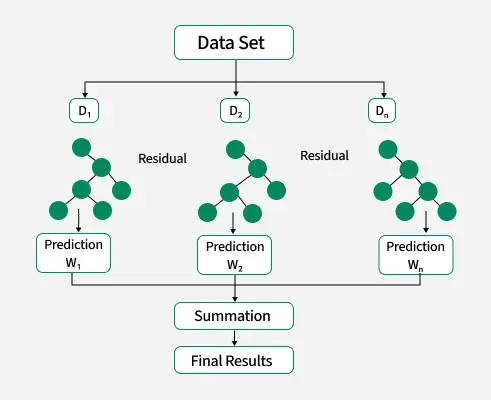

## Parameters in XGBoost

* **Learning Rate ( η ):** An important variable that modifies how much each tree contributes to the final prediction. While more trees are needed smaller values frequently result in more accurate models.

* **Max Depth:** This parameter controls the depth of every tree, avoiding overfitting and being essential to controlling the model's complexity.
* **Gamma:** Based on the decrease in loss it determines when a node in the tree will split. The algorithm becomes more conservative with a higher gamma value hence avoiding splits that don't decreases the loss. It helps in managing tree complexity.
* **Subsample:** Manages the percentage of data that is sampled at random to grow each tree hence lowering variance and enhancing generalization. Setting it too low could result in underfitting.
* **Colsample Bytree:** Establishes the percentage of features that will be sampled at random for growing each tree.
* **n_estimators:** Specifies the number of boosting rounds.
* **alpha (L1 regularization term) and lambda (L2 regularization term):** Control the strength of L1 and L2 regularization respectively. A higher value results in stronger regularization.
* **min_child_weight:** Influences the tree structure by controlling the minimum amount of data required to create a new node.
* **scale_pos_weight:** Useful in imbalanced class scenarios to control the balance of positive and negative weights.

## Implementing Hyperparameter Tuning 

In [2]:
# importing necessary libraries

from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading dataset

dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/Churn_Modelling_gfg.csv"

df = pd.read_csv(dataset)


In [3]:
df.shape
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Split the dataset

X = df.iloc[:, 3:13]
y = df.iloc[:, 13].values

In [10]:
# conerted the categorical columns into numerical columns using get_dummies method

X['Geography'] = X['Geography'].astype('category')
X['Gender'] = X['Gender'].astype('category')

# split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting the dataset into DMatrix format

cgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
cgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [11]:
# creating XGBOOST model

params = {
    'objective':'binary:logistic',
    'max_depth':3,
    'learning_rate':0.1
}

n = 50

model = xgb.train(params, cgb_train, num_boost_round=n)


In [12]:
# Making predictions
preds = model.predict(cgb_test)
preds = np.round(preds)

accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.30%


                             Regression using LightGBM                                    

# Regression using LightGBM   

LightGBM (Light Gradient Boosting Machine) is an open-source gradient boosting framework designed for efficient and scalable machine learning. It works for both structured and unstructured data and is optimized for speed and memory usage.

* Handles large datasets with millions of rows and columns
* Supports parallel and distributed computing
* Uses histogram-based techniques and leaf-wise tree growth for efficiency
* Provides options like Exclusive Feature Bundling (EFB) and Gradient-based One-Side Sampling (GOSS) for faster computation and reduced memory usage

## Working of LightGBM

LightGBM builds trees leaf-wise (splitting the leaf with the highest gain) rather than level-wise, which can improve accuracy but may overfit smaller datasets.

* Uses histograms to bucket continuous values and reduce computations
* Leaf-wise tree growth selects splits with maximum gain
* Exclusive Feature Bundling reduces feature dimensionality
* GOSS prioritizes instances with larger gradients to improve learning efficiency

## Implementing LightGBM

### Importing Libraries


In [13]:
# !pip install lightgbm==3.3.5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import  mean_squared_error as mse
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [14]:
#  Load the dataset

dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/medical_cost_gfg.csv"

df = pd.read_csv(dataset)


In [15]:
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [17]:
df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [21]:
# EDA Analysis

categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    grouped_data = df[[col, 'charges']].groupby(col).mean()
    print(f"\nAverage charges by {col}:\n{grouped_data}\n")


Average charges by sex:
             charges
sex                 
female  12569.578844
male    13956.751178


Average charges by smoker:
             charges
smoker              
no       8434.268298
yes     32050.231832


Average charges by region:
                charges
region                 
northeast  13406.384516
northwest  12417.575374
southeast  14735.411438
southwest  12346.937377



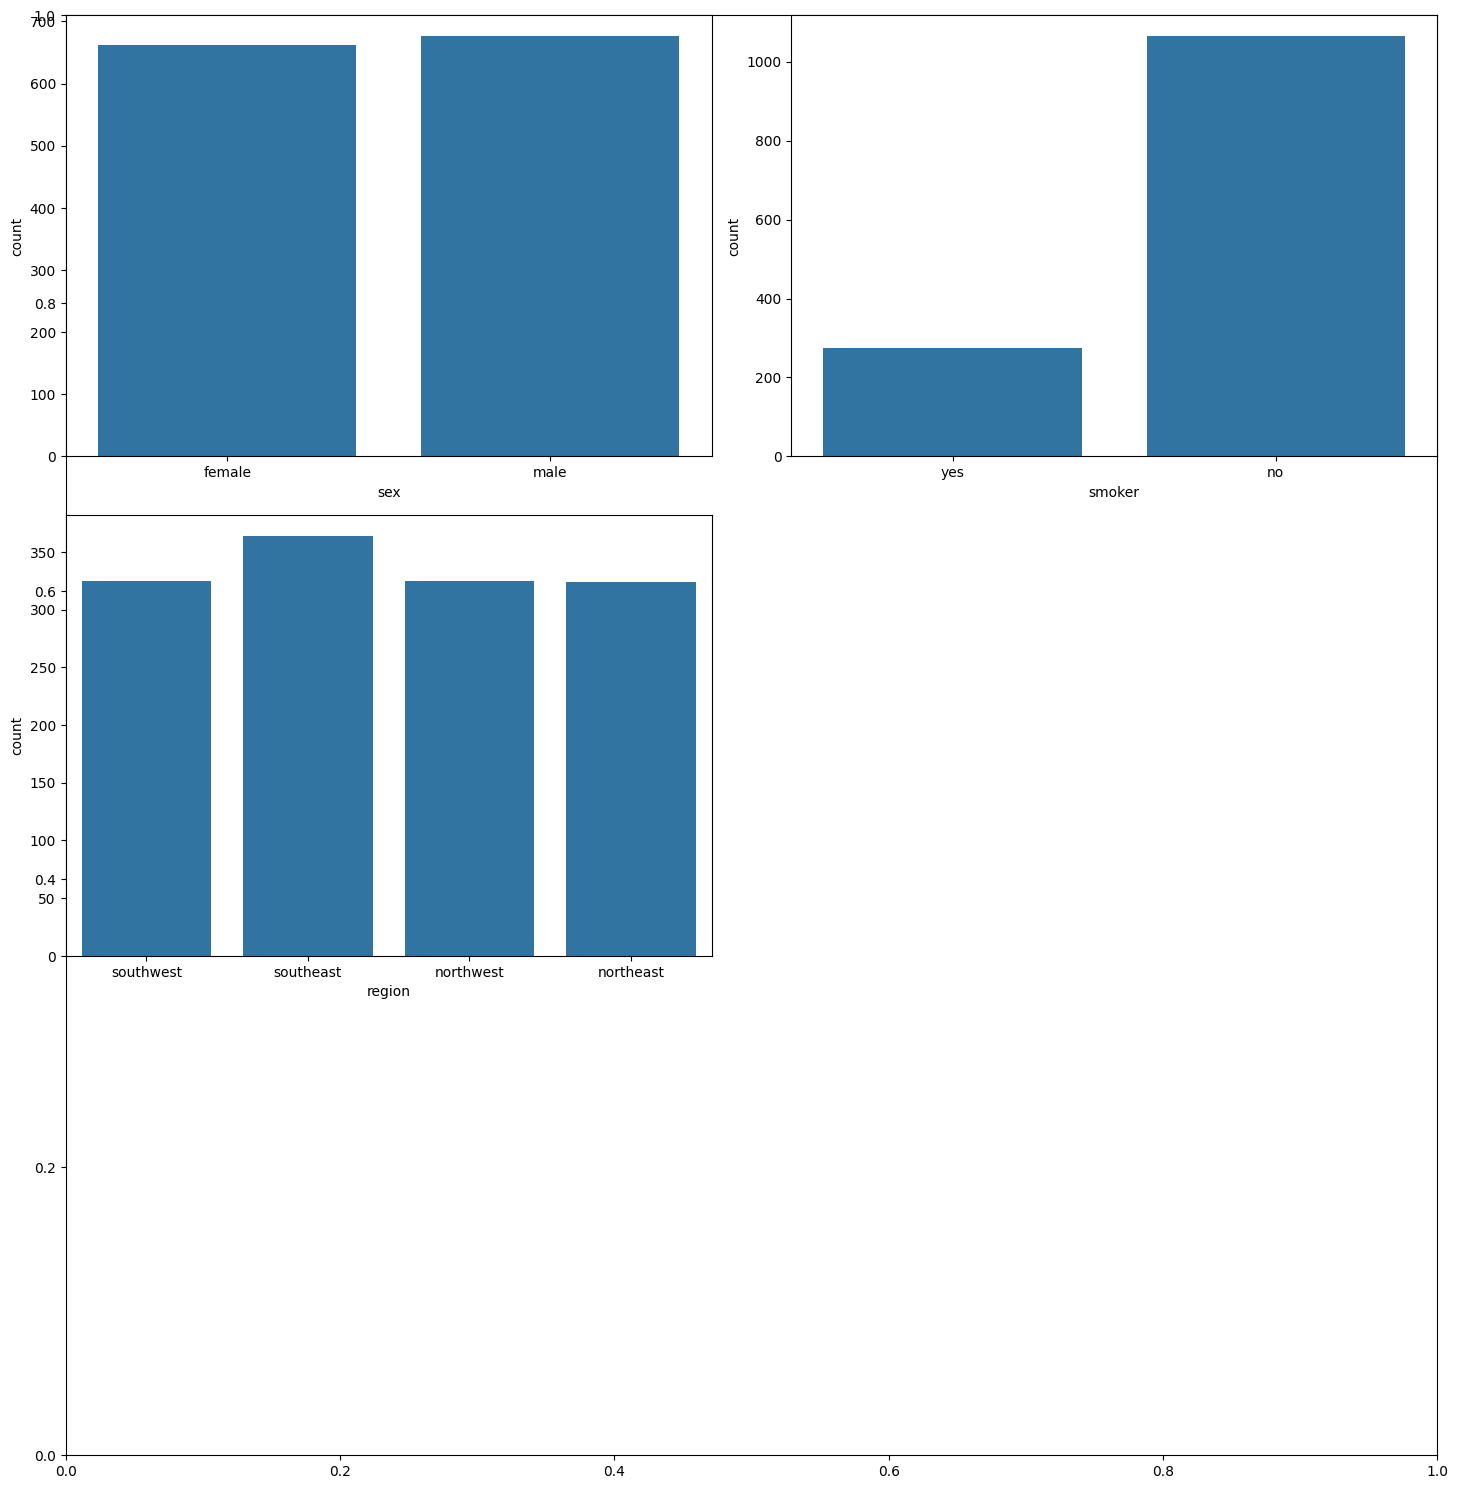

In [28]:
# Visulizing the dataset 
import seaborn as sb

plt.subplots(figsize = (15,15))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sb.countplot(data=df, x=col)
plt.tight_layout()
plt.show()

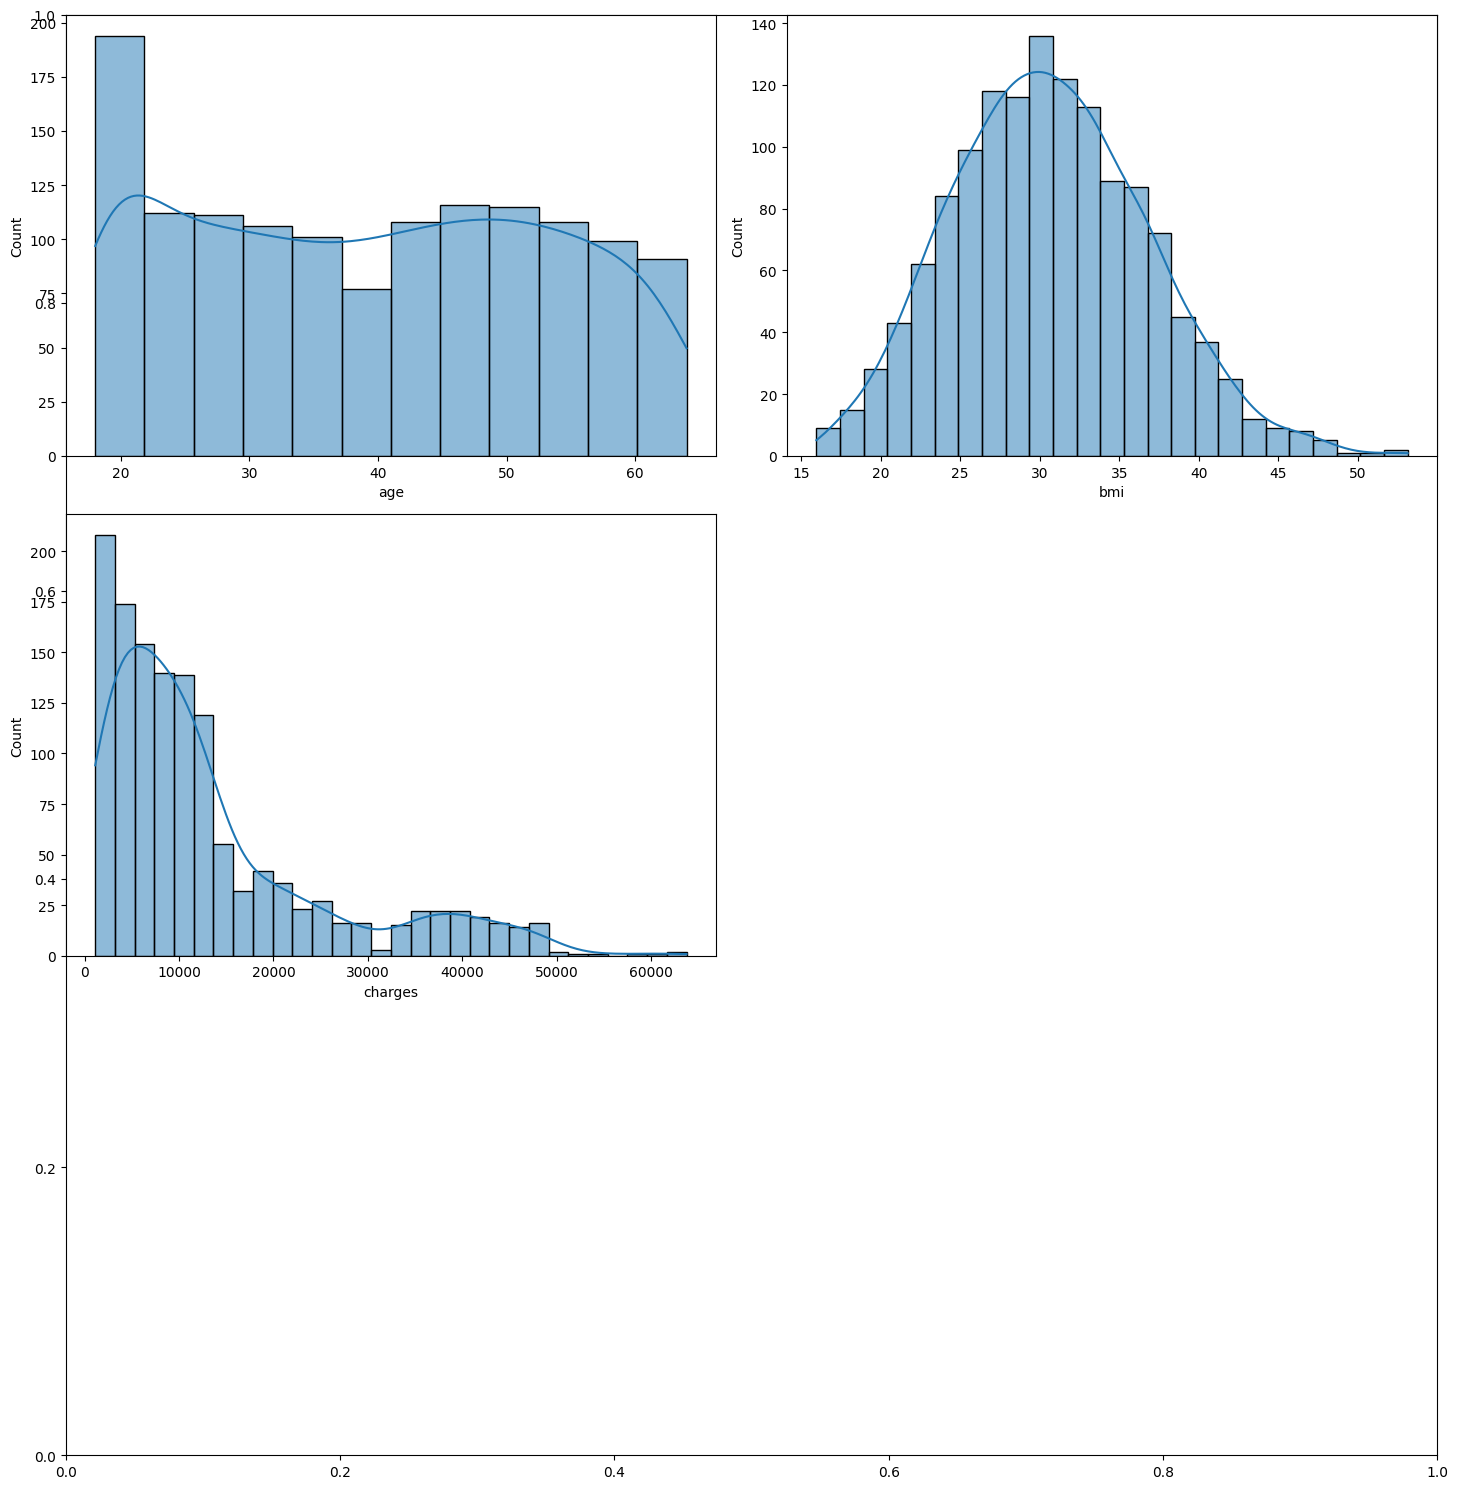

In [29]:
numeric_cols = ['age', 'bmi', 'charges']

plt.subplots(figsize = (15,15))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sb.histplot(data=df, x=col, kde=True)
plt.tight_layout()
plt.show()

In [30]:
 # Binary Encoding the categorical columns

df['sex'] = df['sex'].map({'male':0, 'female':1})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,1,27.900,0,1,southwest,16884.92400
1,2,18,0,33.770,1,0,southeast,1725.55230
2,3,28,0,33.000,3,0,southeast,4449.46200
3,4,33,0,22.705,0,0,northwest,21984.47061
4,5,32,0,28.880,0,0,northwest,3866.85520


In [31]:
# One Hot Encoding for Multi-class categorical column

df = pd.concat([df, pd.get_dummies(df['region']).astype('int')], axis=1)
df.drop(['Id','region'], axis=1, inplace=True)

df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [37]:
# Split and scaling the Data

features = df.drop('charges', axis=1)
target = df['charges']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.25, random_state=2023)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
# Dataset Preparation for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_test)
# Regression Model Using LightGBM

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 9
[LightGBM] [Info] Start training from score 13075.303458
[1]	valid_0's rmse: 11846.6
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 11334.3
[3]	valid_0's rmse: 10851.4
[4]	valid_0's rmse: 10778.5
[5]	valid_0's rmse: 10725.9
[6]	valid_0's rmse: 10290.1
[7]	valid_0's rmse: 9875.8
[8]	valid_0's rmse: 9486.97
[9]	valid_0's rmse: 9126.77
[10]	valid_0's rmse: 8787.78
[11]	valid_0's rmse: 8471.49
[12]	valid_0's rmse: 8177.16
[13]	valid_0's rmse: 7897.91
[14]	valid_0's rmse: 7639.61
[15]	valid_0's rmse: 7399.76
[16]	valid_0's rmse: 7169.64
[17]	valid_0's rmse: 6961.21
[18]	valid_0's rmse: 6765.69
[19]	valid_0's rm

In [38]:
# Predictions and Evaluation

model = LGBMRegressor(metric='rmse')
model.fit(X_train, y_train)

y_train = model.predict(X_train)
y_val = model.predict(X_val)

print("Training RMSE: ", np.sqrt(mse(y_train, y_train)))
print("Validation RMSE: ", np.sqrt(mse(y_val, y_val)))

Training RMSE:  0.0
Validation RMSE:  0.0


                                 Binary Classification using LightGBM              

#  Binary Classification using LightGBM

LightGBM (Light Gradient Boosting Machine) is an open-source gradient boosting framework designed for efficient and scalable machine learning. It is widely used for classification tasks, including binary classification and is optimized for speed and memory usage.



In [39]:
# Installing Libraries
# !pip install lightgbm

# Impoerting Libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/diabetes1.csv')

In [40]:
# Preview the dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df.shape

(768, 9)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


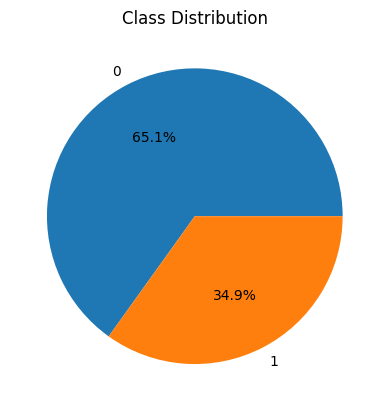

In [43]:
# EDA
temp = df['Outcome'].value_counts()
plt.pie(temp.values, labels=temp.index.values, autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()

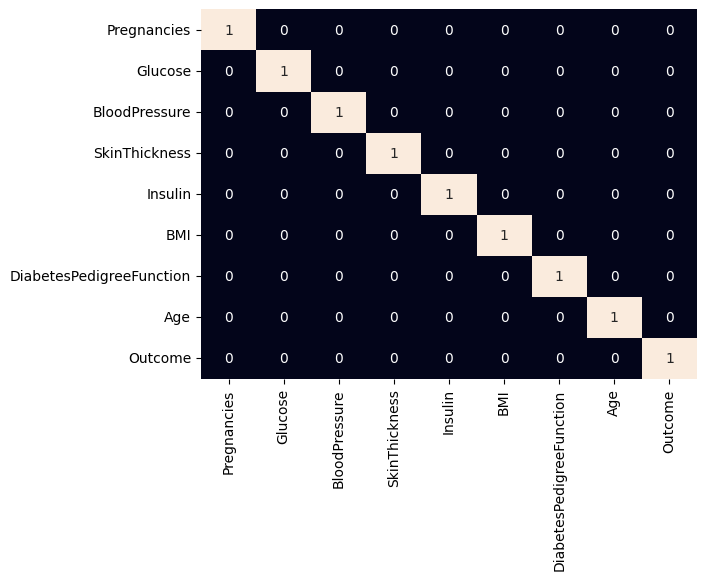

In [44]:
sb.heatmap(df.corr() > 0.7, cbar=False, annot=True)
plt.show()

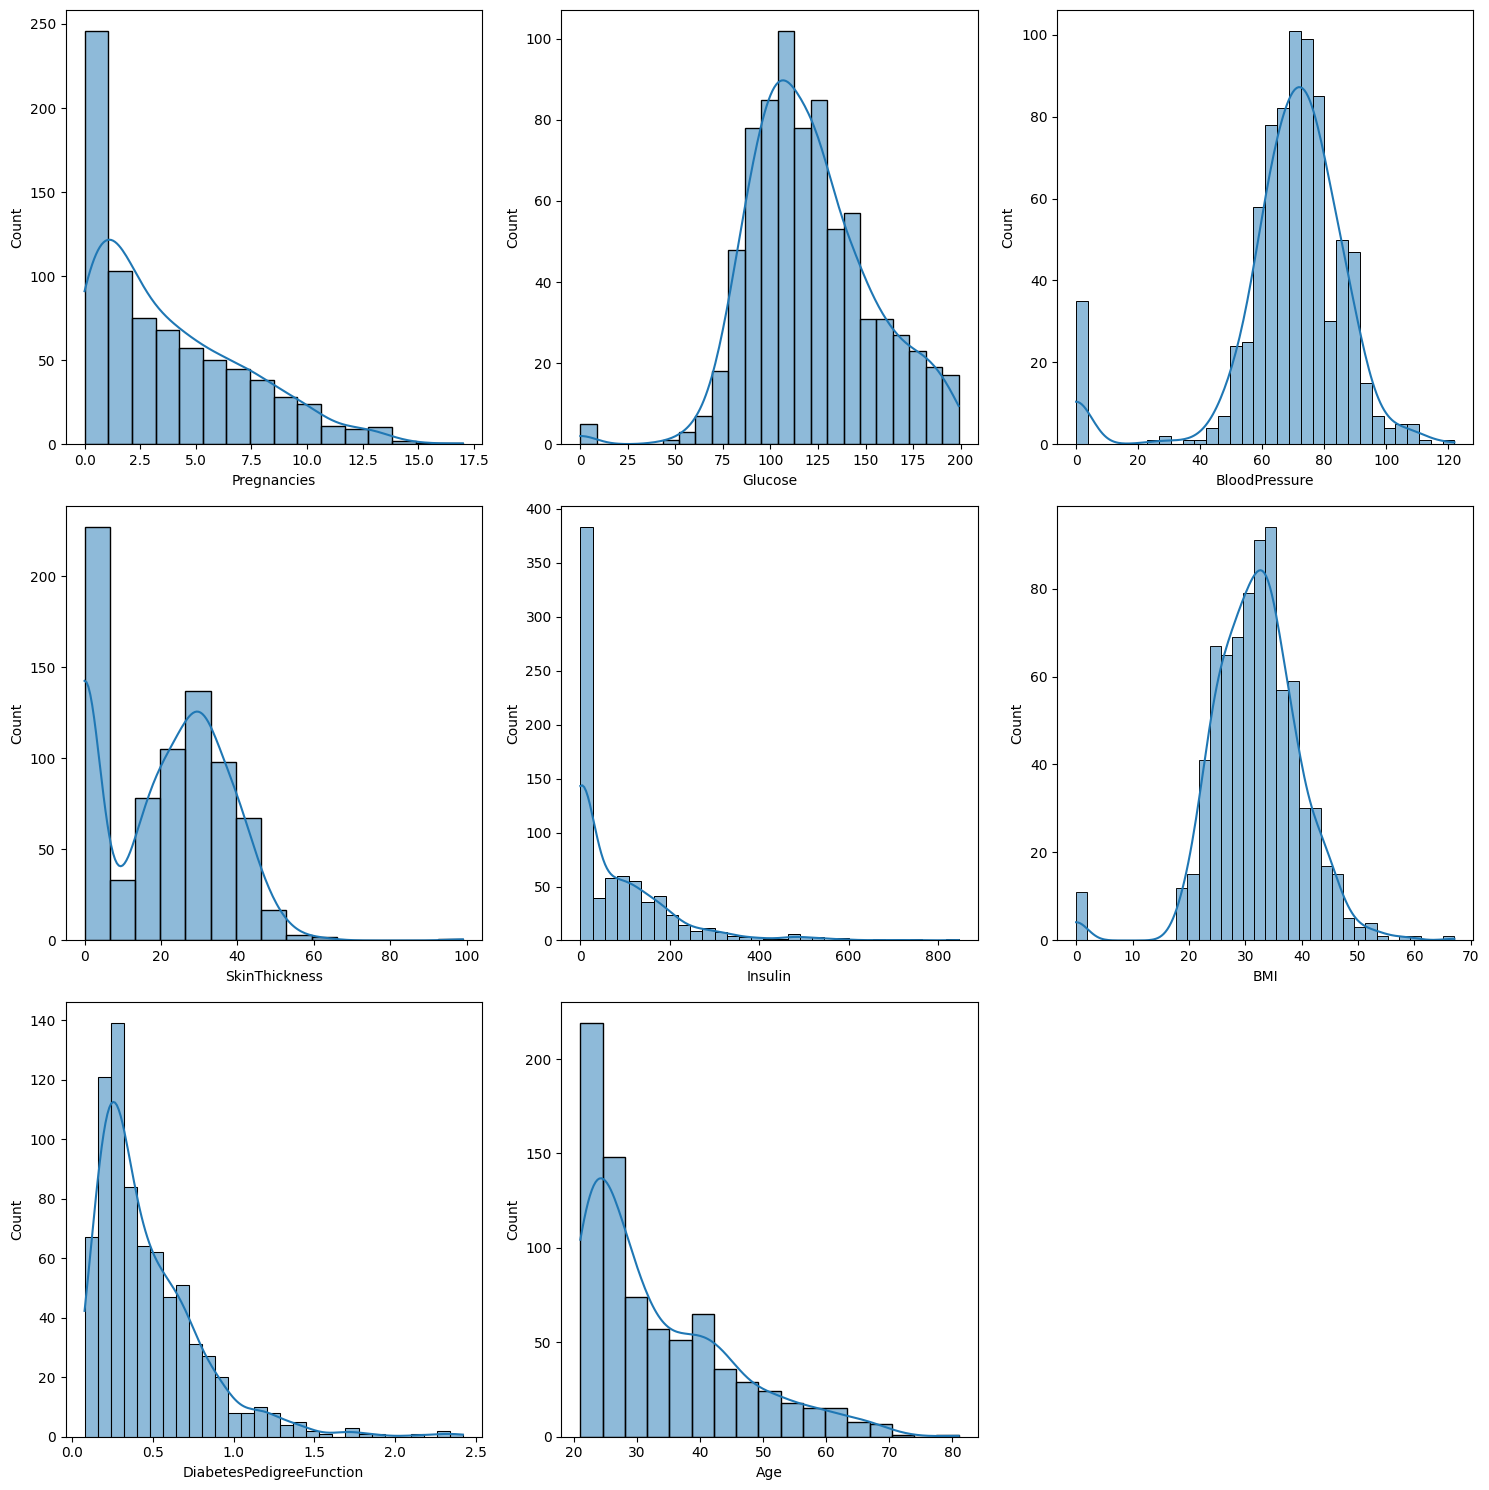

In [45]:
# Feature Distribution

num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(15, 15))
for col in num_cols:
    plt.subplot(3, 3, num_cols.index(col)+1)
    sb.histplot(df[col], kde=True)

plt.tight_layout()
plt.show()

In [46]:
# Data Preprocessing

# splititng data

features = df.drop('Outcome', axis=1)
target = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Dataset Preparation for LightGBM

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [54]:
parms = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
num_round = 100
bst = lgb.train(parms, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 614, number of negative: 0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Info] Start training from score 34.539576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[1]	valid_0's auc: 1
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[2]	valid_0's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that m

In [68]:
# Prediction and Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

pred = bst.predict(X_test)

print("RMSE:", mean_squared_error(y_test, pred, squared=False))
print("R2 Score:", r2_score(y_test, pred))

RMSE: 0.0
R2 Score: 1.0
